<h1>Random Forest Classifier</h1>

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
y_pred = clf.predict(X_test)

In [6]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


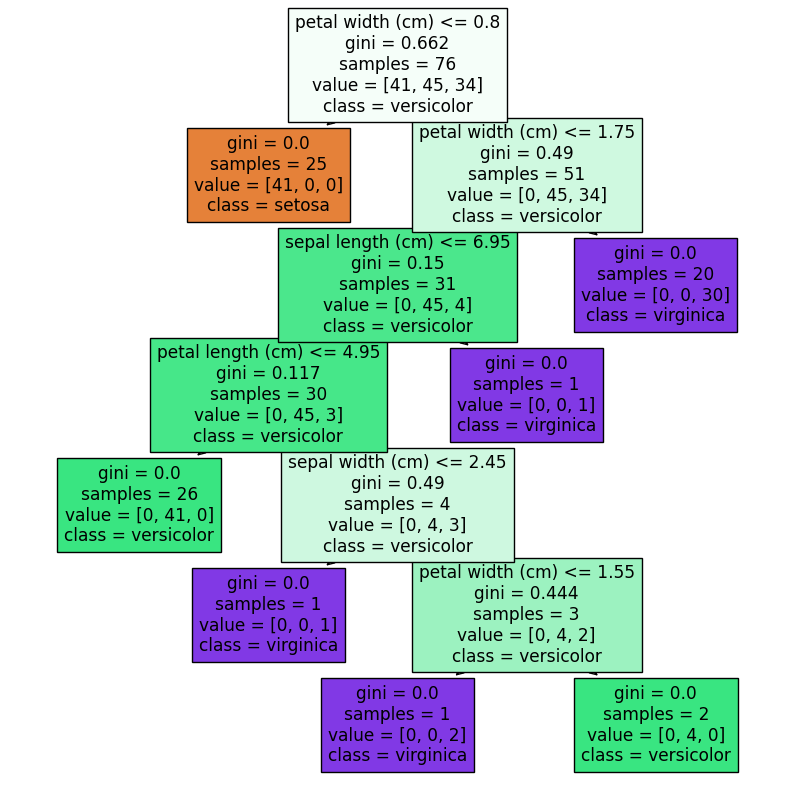

In [7]:
tree_to_visualize = clf.estimators_[0]
fig = plt.figure(figsize=(10, 10))
_ = tree.plot_tree(tree_to_visualize, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

<h2>Hyper-parameter Tuning</h2>

In [22]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

In [19]:
param_grid = {
    'n_estimators': [10,20,50,100,500],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced'],
    'random_state': [1,2,5,10,20,50],
    'max_features': ['sqrt', 'log2', 5, 10, 20, 50, 100],
    'max_depth' : [None, 5, 10, 20, 50]
}

In [24]:
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

0it [00:58, ?it/s]


KeyboardInterrupt: 

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
print("Best parameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)

print("Best estimator:", grid_search.best_estimator_)

results = grid_search.cv_results_
print("All results:")

for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Mean score:", mean_score, "Parameters:", params)